In [2]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc

! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf

from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge2.gwf', channel="H1:CHALLENGE2")


from pycbc import frame
pycbc_strain = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
--2024-02-26 00:09:33--  https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/s/workshop3/challenge/challenge2.gwf [following]
--2024-02-26 00:09:34--  https://gwosc.org/s/workshop3/challenge/challenge2.gwf
Resolving gwosc.org (gwosc.org)... 131.215.113.73
Connecting to gwosc.org (gwosc.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025842 (3.8M)
Savin

/opt/conda/lib/python3.8/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [3]:
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge2.gwf', channel="H1:CHALLENGE2")

In [4]:
from pycbc import frame
pycbc_strain = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')

Starting time of sampling data -64.0 s


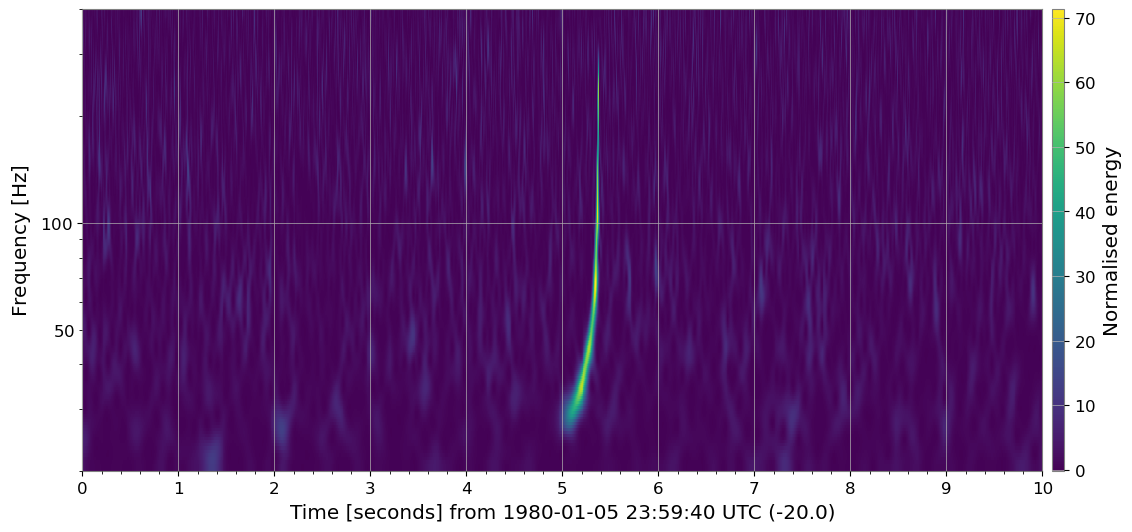

In [7]:
#Q-transform to approximate merger time: 

print('Starting time of sampling data',gwpy_strain.t0)
q = gwpy_strain.q_transform(frange=(20, 400), qrange=(10, 15), outseg=(-20,-10))
plot = q.plot()
ax = plot.gca()
ax.set_yscale("log")
ax.colorbar(label="Normalised energy")

In [ ]:
# Time of merger event: 5.4-20 = -14.6s 
print('Estimated time of mer

In [31]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

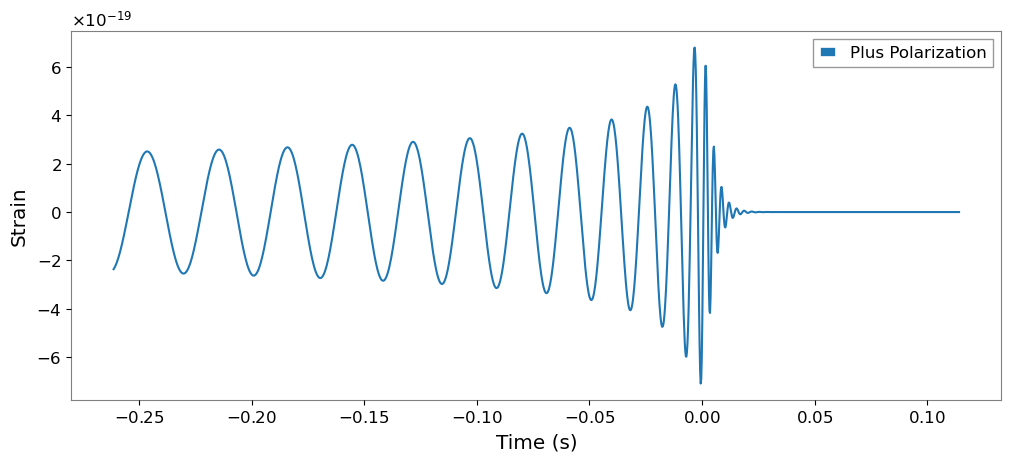

In [32]:
# Generate waveform template
# underscore to initialise (empty) object for second output for the function

hp,_ = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30,
                         delta_t= pycbc_strain.delta_t ,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

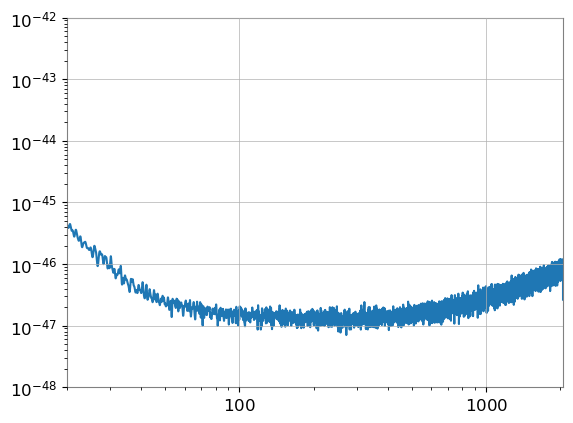

In [33]:
from pycbc.psd import interpolate, inverse_spectrum_truncation

conditioned = pycbc_strain.crop(2,2)
psdc = conditioned.psd(4)
psdc = interpolate(psdc, conditioned.delta_f)

psdc = inverse_spectrum_truncation(psdc, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

plotpsdc = psdc.plot()

# Make sure plotpsdc is a single plot object, not a list
if isinstance(plotpsdc, list):
    plotpsdc = plotpsdc[0]

# Access the current figure and its axis
fig = plotpsdc.figure
ax = fig.gca() 
# Limit frequency from 20 Hz up to Nyquist frequency 
ax.set_xlim(20, 0.5*sampling_rate)
ax.set_xlim(20, )
ax.set_xscale('log')
ax.set_ylim(1e-48, 1e-42)
ax.set_yscale('log')


In [40]:
hp.resize(len(conditioned))

template = hp.cyclic_time_shift(hp.start_time)


507904
507904
524288


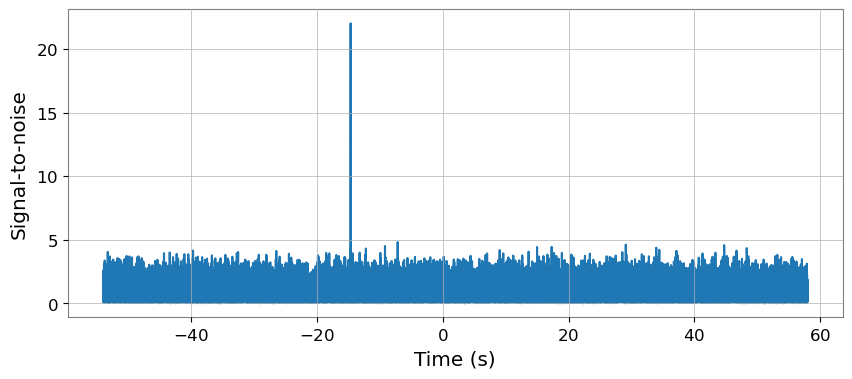

We found a signal at -14.6328125s with SNR 22.029242547273782


In [41]:
template = hp.cyclic_time_shift(hp.start_time)

from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned,
                     psd=psdc, low_frequency_cutoff=20)

snr = snr.crop(4 + 4, 4)

pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]


print("We found a signal at {}s with SNR {}".format(time,
                                                    abs(snrp)))

In [ ]:
# Matches up with the estimation from q-transform plot